# Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps


In [111]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [112]:
df = pd.read_csv("D:/glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [114]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [115]:
df[df.duplicated()].shape

(1, 10)

In [116]:
df.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [117]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [118]:
df["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

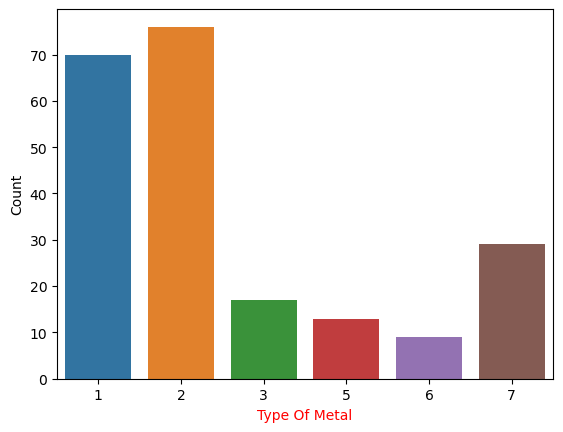

In [119]:
sns.countplot(x=df["Type"].values, data=df,)
plt.xlabel("Type Of Metal",color="red")
plt.ylabel("Count")
plt.show()


# Transformation Of a continuous Variable with Z-Value this is -3 to +3

In [120]:
Y = df["Type"]
X = df.iloc[:, 0:9]

In [121]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [122]:
from sklearn.preprocessing import  StandardScaler
ss= StandardScaler()
X1=ss.fit_transform(X)

In [123]:
X1

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [124]:
X1=pd.DataFrame(X1)

In [125]:
X1

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [126]:
X1.columns=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

In [127]:
X1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


# When n_neighbors is Equl To 9

In [128]:
train_Accuracy=[]
test_Accuracy=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as ac
from scipy import stats

In [129]:
from sklearn.model_selection import train_test_split
for i in range(1,101):#### For The Accuracy Cosistency We Will Provide A For Loop.........
    knn = KNeighborsClassifier(n_neighbors=9,p=2) # p=2 --> Eucledian
    X_train,X_test,Y_train,Y_test = train_test_split(X1,Y, test_size=0.3,random_state=(i))
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    train_Accuracy.append(ac(Y_train,Y_pred_train))
    test_Accuracy.append(ac(Y_test,Y_pred_test))

In [130]:
print(train_Accuracy)

[0.7046979865771812, 0.6577181208053692, 0.7114093959731543, 0.6644295302013423, 0.697986577181208, 0.7046979865771812, 0.7114093959731543, 0.7449664429530202, 0.738255033557047, 0.7986577181208053, 0.7248322147651006, 0.6778523489932886, 0.7114093959731543, 0.7046979865771812, 0.697986577181208, 0.7046979865771812, 0.7114093959731543, 0.6912751677852349, 0.6845637583892618, 0.738255033557047, 0.7181208053691275, 0.7516778523489933, 0.6778523489932886, 0.7583892617449665, 0.7114093959731543, 0.697986577181208, 0.6912751677852349, 0.7046979865771812, 0.6711409395973155, 0.697986577181208, 0.697986577181208, 0.6510067114093959, 0.6845637583892618, 0.7114093959731543, 0.6577181208053692, 0.6577181208053692, 0.7248322147651006, 0.6510067114093959, 0.7315436241610739, 0.7315436241610739, 0.7516778523489933, 0.697986577181208, 0.697986577181208, 0.6845637583892618, 0.7114093959731543, 0.6912751677852349, 0.7114093959731543, 0.7315436241610739, 0.6711409395973155, 0.6912751677852349, 0.731543

In [131]:
print(test_Accuracy)

[0.7384615384615385, 0.7076923076923077, 0.7384615384615385, 0.7230769230769231, 0.7076923076923077, 0.5692307692307692, 0.5692307692307692, 0.5846153846153846, 0.6461538461538462, 0.5538461538461539, 0.5230769230769231, 0.6923076923076923, 0.5692307692307692, 0.7076923076923077, 0.6461538461538462, 0.6307692307692307, 0.6461538461538462, 0.676923076923077, 0.676923076923077, 0.5846153846153846, 0.6153846153846154, 0.6461538461538462, 0.6307692307692307, 0.5230769230769231, 0.676923076923077, 0.5692307692307692, 0.676923076923077, 0.5692307692307692, 0.6461538461538462, 0.5692307692307692, 0.5384615384615384, 0.676923076923077, 0.5692307692307692, 0.6153846153846154, 0.676923076923077, 0.6923076923076923, 0.5538461538461539, 0.7538461538461538, 0.5846153846153846, 0.6153846153846154, 0.6461538461538462, 0.6153846153846154, 0.6307692307692307, 0.6307692307692307, 0.6153846153846154, 0.6923076923076923, 0.6307692307692307, 0.6461538461538462, 0.6615384615384615, 0.676923076923077, 0.6615

In [132]:
import numpy as np
print("Trainning Accuracy Will Be:.........",np.mean(train_Accuracy).round(2))
import numpy as np
print("Test Accuracy Accuracy Will Be:.........",np.mean(test_Accuracy).round(2))

Trainning Accuracy Will Be:......... 0.7
Test Accuracy Accuracy Will Be:......... 0.63


In [133]:
train_Accuracy1=[]
test_Accuracy1=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as ac

In [134]:
from sklearn.model_selection import train_test_split
for i in range(1,101):#### For The Accuracy Cosistency We Will Provide A For Loop.........
    knn = KNeighborsClassifier(n_neighbors=7,p=2) # p=2 --> Eucledian
    X_train,X_test,Y_train,Y_test = train_test_split(X1,Y, test_size=0.3,random_state=(i))
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    train_Accuracy1.append(ac(Y_train,Y_pred_train))
    test_Accuracy1.append(ac(Y_test,Y_pred_test))

In [135]:
print(train_Accuracy1)

[0.7046979865771812, 0.6644295302013423, 0.7181208053691275, 0.6711409395973155, 0.7046979865771812, 0.7248322147651006, 0.7583892617449665, 0.7583892617449665, 0.7516778523489933, 0.7785234899328859, 0.7449664429530202, 0.6711409395973155, 0.738255033557047, 0.7583892617449665, 0.7248322147651006, 0.7114093959731543, 0.7046979865771812, 0.7181208053691275, 0.6845637583892618, 0.738255033557047, 0.7181208053691275, 0.7181208053691275, 0.7315436241610739, 0.7651006711409396, 0.7248322147651006, 0.7449664429530202, 0.6912751677852349, 0.7114093959731543, 0.6845637583892618, 0.7248322147651006, 0.7046979865771812, 0.6711409395973155, 0.7046979865771812, 0.7516778523489933, 0.6644295302013423, 0.6644295302013423, 0.7516778523489933, 0.6845637583892618, 0.7181208053691275, 0.7248322147651006, 0.7248322147651006, 0.7315436241610739, 0.7315436241610739, 0.7046979865771812, 0.7181208053691275, 0.7181208053691275, 0.7315436241610739, 0.6845637583892618, 0.6778523489932886, 0.7046979865771812, 0

In [136]:
print(test_Accuracy1)

[0.7230769230769231, 0.6615384615384615, 0.6923076923076923, 0.7538461538461538, 0.6923076923076923, 0.5846153846153846, 0.6153846153846154, 0.5692307692307692, 0.6461538461538462, 0.49230769230769234, 0.49230769230769234, 0.7230769230769231, 0.5538461538461539, 0.6615384615384615, 0.6153846153846154, 0.6307692307692307, 0.6307692307692307, 0.6307692307692307, 0.6615384615384615, 0.6153846153846154, 0.5846153846153846, 0.6153846153846154, 0.6615384615384615, 0.5230769230769231, 0.6923076923076923, 0.5230769230769231, 0.6923076923076923, 0.6153846153846154, 0.6923076923076923, 0.6, 0.5384615384615384, 0.676923076923077, 0.5846153846153846, 0.5846153846153846, 0.6923076923076923, 0.6923076923076923, 0.6, 0.7538461538461538, 0.5538461538461539, 0.6153846153846154, 0.6615384615384615, 0.6461538461538462, 0.5846153846153846, 0.6461538461538462, 0.6615384615384615, 0.676923076923077, 0.676923076923077, 0.6461538461538462, 0.6615384615384615, 0.676923076923077, 0.676923076923077, 0.6615384615

In [137]:
import numpy as np
print("Trainning Accuracy Will Be:.........",np.mean(train_Accuracy1).round(2))
import numpy as np
print("Test Accuracy Accuracy Will Be:.........",np.mean(test_Accuracy1).round(2))

Trainning Accuracy Will Be:......... 0.71
Test Accuracy Accuracy Will Be:......... 0.64


In [138]:
train_Accuracy2=[]
test_Accuracy2=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as ac

In [144]:
from sklearn.model_selection import train_test_split
for i in range(1,101):#### For The Accuracy Cosistency We Will Provide A For Loop.........
    knn = KNeighborsClassifier(n_neighbors=5,p=2) # p=2 --> Eucledian
    X_train,X_test,Y_train,Y_test = train_test_split(X1,Y, test_size=0.3,random_state=(i))
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    train_Accuracy2.append(ac(Y_train,Y_pred_train))
    test_Accuracy2.append(ac(Y_test,Y_pred_test))

In [145]:
print(train_Accuracy2)

[0.7718120805369127, 0.697986577181208, 0.7516778523489933, 0.7114093959731543, 0.7315436241610739, 0.7449664429530202, 0.7785234899328859, 0.7516778523489933, 0.7583892617449665, 0.8187919463087249, 0.8053691275167785, 0.7248322147651006, 0.7516778523489933, 0.7181208053691275, 0.7248322147651006, 0.7718120805369127, 0.7449664429530202, 0.7449664429530202, 0.738255033557047, 0.7651006711409396, 0.7516778523489933, 0.7583892617449665, 0.7583892617449665, 0.7785234899328859, 0.7516778523489933, 0.7583892617449665, 0.6912751677852349, 0.7516778523489933, 0.7114093959731543, 0.7315436241610739, 0.7449664429530202, 0.697986577181208, 0.7248322147651006, 0.7583892617449665, 0.6778523489932886, 0.738255033557047, 0.7583892617449665, 0.7181208053691275, 0.7516778523489933, 0.7516778523489933, 0.7516778523489933, 0.7583892617449665, 0.7919463087248322, 0.7181208053691275, 0.7651006711409396, 0.7651006711409396, 0.7315436241610739, 0.7315436241610739, 0.7516778523489933, 0.7583892617449665, 0.7

In [146]:
print(test_Accuracy2)

[0.7384615384615385, 0.6615384615384615, 0.6923076923076923, 0.7384615384615385, 0.7076923076923077, 0.6, 0.676923076923077, 0.5230769230769231, 0.5846153846153846, 0.5230769230769231, 0.49230769230769234, 0.6923076923076923, 0.6307692307692307, 0.6307692307692307, 0.6461538461538462, 0.676923076923077, 0.6615384615384615, 0.6461538461538462, 0.6615384615384615, 0.5692307692307692, 0.6, 0.6307692307692307, 0.6461538461538462, 0.5384615384615384, 0.6615384615384615, 0.5230769230769231, 0.6153846153846154, 0.6307692307692307, 0.7230769230769231, 0.6307692307692307, 0.6307692307692307, 0.6615384615384615, 0.6307692307692307, 0.5384615384615384, 0.7076923076923077, 0.6615384615384615, 0.5846153846153846, 0.7538461538461538, 0.6, 0.6153846153846154, 0.6461538461538462, 0.6461538461538462, 0.6307692307692307, 0.6615384615384615, 0.6307692307692307, 0.6923076923076923, 0.676923076923077, 0.6615384615384615, 0.6615384615384615, 0.676923076923077, 0.6461538461538462, 0.6461538461538462, 0.46153

In [147]:
import numpy as np
print("Trainning Accuracy Will Be:.........",np.mean(train_Accuracy2).round(2))
import numpy as np
print("Test Accuracy Accuracy Will Be:.........",np.mean(test_Accuracy2).round(2))

Trainning Accuracy Will Be:......... 0.74
Test Accuracy Accuracy Will Be:......... 0.64
